In [123]:
import pandas as pd
import requests
from io import StringIO
import seaborn as sns
from neuralprophet import NeuralProphet
import pandas as pd
import numpy as np

# Monkey-patch: if np.NaN is missing, set it to np.nan
if not hasattr(np, 'NaN'):
    np.NaN = np.nan

version_url = "https://api.beta.ons.gov.uk/v1/datasets/retail-sales-index/editions/time-series/versions/32"
response = requests.get(version_url)
response.raise_for_status()  # Raises an exception for HTTP errors
data = response.json()


# Extract the CSV download URL.
csv_url = data["downloads"]["csv"]["href"]

# Download the CSV data.
csv_response = requests.get(csv_url)
csv_response.raise_for_status()



In [124]:
df = pd.read_csv(StringIO(csv_response.text))

In [125]:
df_mom= df[
    (df['type-of-prices']=="chained-volume-percentage-change-on-previous-month") & 
    (df['sic-unofficial']=="all-retailing-including-automotive-fuel")
    ].sort_values('mmm-yy')

df_mom['ds'] = pd.to_datetime('01-' + df_mom['mmm-yy'], format='%d-%b-%y')

<Axes: xlabel='ds', ylabel='y'>

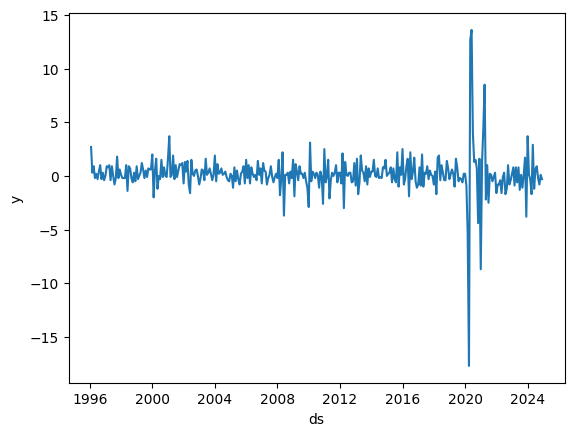

In [134]:
df_agg = df_mom[['ds','v4_1']].copy()
df_agg.columns = ['ds', 'y']


sns.lineplot(data=df_agg, x="ds",y="y")


In [143]:
df_input = df_agg.sort_values('ds').dropna().reset_index(drop=True)

In [161]:
df_input[~(df_input.ds==max(df_input.ds))]

,ds,y
0,1996-02-01,2.7
1,1996-03-01,0.3
2,1996-04-01,0.9
3,1996-05-01,-0.2
4,1996-06-01,0.2
...,...,...
341,2024-07-01,0.6
342,2024-08-01,0.9
343,2024-09-01,-0.2
344,2024-10-01,-0.8


In [144]:
m = NeuralProphet()

metrics = m.fit(df_input, freq='ME')

future = m.make_future_dataframe(df_input, periods=12)

forecast = m.predict(future)

fig_forecast = m.plot(forecast)
fig_components = m.plot_components(forecast)


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.712]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (22) is too small than the required number                     for the learning rate finder (216). The results might not be optimal.
Finding best initial lr: 100%|██████████| 216/216 [00:00<00:00, 273.28it/s]


Training: |          | 0/? [00:14<?, ?it/s, v_num=5, train_loss=0.0109, reg_loss=0.000, MAE=0.952, RMSE=1.520, Loss=0.0108, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.712]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.




WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - ME
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 110.75it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:98: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `n

WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:283: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




In [147]:
merged_df = pd.merge(forecast[['ds', 'yhat1']], df_input, on='ds', how='outer')

,ds,yhat1,y,combined,is_forecast
347,2024-12-31,-0.130854,NaN,-0.130854,True
348,2025-01-31,0.019608,NaN,0.019608,True
349,2025-02-28,-0.272219,NaN,-0.272219,True
350,2025-03-31,-0.053299,NaN,-0.053299,True
351,2025-04-30,0.198677,NaN,0.198677,True
352,2025-05-31,-0.075980,NaN,-0.075980,True
353,2025-06-30,0.106379,NaN,0.106379,True
354,2025-07-31,-0.219778,NaN,-0.219778,True
355,2025-08-31,-0.125896,NaN,-0.125896,True
356,2025-09-30,-0.137343,NaN,-0.137343,True


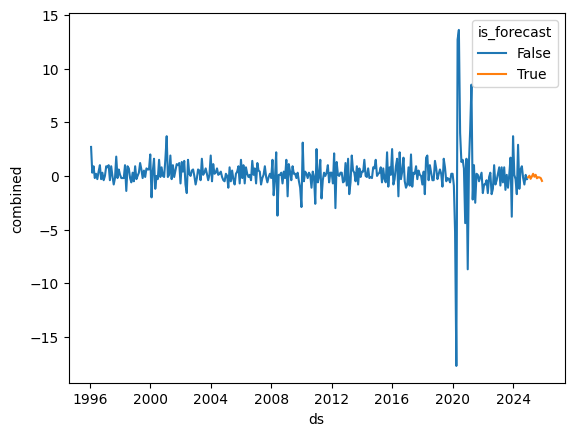

In [148]:
merged_df['combined'] = merged_df['y'].fillna(merged_df['yhat1'])

merged_df['is_forecast'] = merged_df.y.isna()

merged_df
sns.lineplot(data = merged_df, x='ds',y='combined', hue='is_forecast')

merged_df.tail(12)

In [152]:
merged_df[merged_df.is_forecast].head(1)

,ds,yhat1,y,combined,is_forecast
347,2024-12-31,-0.130854,NaN,-0.130854,True
